In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%pylab inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Populating the interactive namespace from numpy and matplotlib


# Read the data

In [2]:
train_path = os.path.abspath('train.csv')

In [3]:
test_path = os.path.abspath('test.csv')

In [4]:
train = pd.read_csv(train_path)
train.tail(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
test = pd.read_csv(test_path)
test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


# Check the null data

In [6]:
feature_train, target = train, train.pop('SalePrice')

In [7]:
feature = pd.concat([feature_train,test])

In [8]:
feature.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

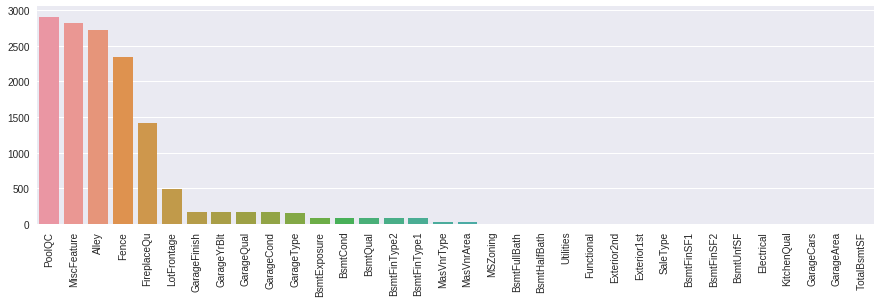

In [9]:
#check train null data
col_null_info = feature.isnull().sum(); 
col_null_info = col_null_info[col_null_info>0].sort_values(ascending=False)
plt.figure(figsize=(15,4))
sns.barplot(x=col_null_info.index, y=col_null_info.values)
plt.xticks(rotation=90)

# Clean Null Data

In [10]:
#Clean Data
feature['MSZoning'] = feature['MSZoning'].fillna('RM')
feature['Utilities'] = feature['Utilities'].fillna(feature['Utilities'].mode())
feature['Exterior1st'] = feature['Exterior1st'].fillna(feature['Exterior1st'].mode())
feature['Exterior2nd'] = feature['Exterior2nd'].fillna('Other')
feature['BsmtFinSF1'] = feature['BsmtFinSF1'].fillna(0)
feature['BsmtFinSF2'] = feature['BsmtFinSF2'].fillna(0)
feature['BsmtUnfSF'] = feature['BsmtUnfSF'].fillna(0)
feature['TotalBsmtSF'] = feature['TotalBsmtSF'].fillna(0)
feature['BsmtFullBath'] = feature['BsmtFullBath'].fillna(0)
feature['BsmtHalfBath'] = feature['BsmtHalfBath'].fillna(0)
feature['KitchenQual'] = feature['KitchenQual'].fillna('TA')
feature['Functional'] = feature['Functional'].fillna('Typ')
feature['GarageCars'] = feature['GarageCars'].fillna(0)
feature['GarageArea'] = feature['GarageArea'].fillna(0)
feature['SaleType'] = feature['SaleType'].fillna('Oth')
feature['LotFrontage'] = feature['LotFrontage'].fillna(0)
feature['Alley'] = feature['Alley'].fillna('NA')
feature['MasVnrType'] = feature['MasVnrType'].fillna('None')
feature['MasVnrArea'] = feature['MasVnrArea'].fillna(0)
feature['BsmtQual'] = feature['BsmtQual'].fillna('NA')
feature['BsmtCond'] = feature['BsmtCond'].fillna('NA')
feature['BsmtExposure'] = feature['BsmtExposure'].fillna('NA')
feature['BsmtFinType1'] = feature['BsmtFinType1'].fillna('NA')
feature['BsmtFinType2'] = feature['BsmtFinType2'].fillna('NA')
feature['Electrical'] = feature['Electrical'].fillna(feature['Electrical'].mode())
feature['FireplaceQu'] = feature['FireplaceQu'].fillna('No_Fireplace')
feature['GarageType'] = feature['GarageType'].fillna('NA')
feature['GarageYrBlt'] = feature['GarageYrBlt'].fillna(feature['YrSold'])
feature['GarageFinish'] = feature['GarageFinish'].fillna('NA')
feature['GarageQual'] = feature['GarageQual'].fillna('No_Garage')
feature['GarageCond'] = feature['GarageCond'].fillna('No_Garage')
feature['PoolQC'] = feature['PoolQC'].fillna('No_Pool')
feature['Fence'] = feature['Fence'].fillna('NA')
feature['MiscFeature'] = feature['MiscFeature'].fillna('NA')

# View all columns' distribution

In [11]:
#Here use for summary the categorical columns
feature['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

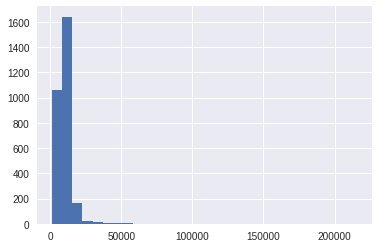

In [12]:
#Here use for showing the distribution of the data
feature['LotArea'].hist(bins=30)

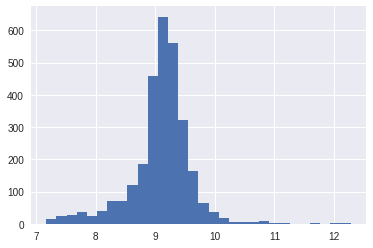

In [13]:
#Here use for showing the distribution after log transformation
feature['LotArea'].apply(np.log1p).hist(bins=30)

In [14]:
#Numerical columns use log transformation
log1p_col = ['LotFrontage','LotArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','BsmtUnfSF',
            '2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF',
            'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
for col in log1p_col:
    feature[col] = feature[col].apply(np.log1p)

#Calculate the building age and binning the age
feature['Building_age'] = feature['YrSold'] - feature['YearBuilt']
for idx in feature.loc[feature.Building_age<0].index:
    feature.loc[idx, 'Building_age'] = 0
feature['Building_age_class'] = pd.cut(feature['Building_age'], bins=14)
feature['Building_age'] = feature['Building_age'].apply(np.log1p)

#Calculate the age of the house after remodification and binning the age
feature['Remod_age'] = feature['YrSold'] - feature['YearRemodAdd']
feature['Remod_age_class'] = pd.cut(feature['Remod_age'], bins=6)
for idx in feature.loc[feature.Remod_age<0].index:
    feature.loc[idx, 'Remod_age'] = 0
feature['Remod_age'] = feature['Remod_age'].apply(np.log1p)

#Calculate the age of garage and binning the age
feature['GarageYrBlt_age'] = feature['YrSold'] - feature['GarageYrBlt']
feature['GarageYrBlt_age_class'] = pd.cut(feature['GarageYrBlt_age'], bins=10)
for idx in feature.loc[feature.GarageYrBlt_age<0].index:
    feature.loc[idx, 'GarageYrBlt_age'] = 0
feature['GarageYrBlt_age'] = feature['GarageYrBlt_age'].apply(np.log1p)

#Map the quality to different grade
exter_qual = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1,'Na':0,
              'No_Fireplace':0, 'No_Garage':0, 'No_Pool':0}
feature['ExterQual'] = feature['ExterQual'].map(exter_qual)
feature['ExterCond'] = feature['ExterCond'].map(exter_qual)
feature['HeatingQC'] = feature['HeatingQC'].map(exter_qual)
feature['KitchenQual'] = feature['KitchenQual'].map(exter_qual)
feature['FireplaceQu'] = feature['FireplaceQu'].map(exter_qual)
feature['GarageQual'] = feature['GarageQual'].map(exter_qual)
feature['GarageCond'] = feature['GarageCond'].map(exter_qual)
feature['PoolQC'] = feature['PoolQC'].map(exter_qual)

#Map the basement quality and condition
bsmt_qual = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
feature['BsmtQual'] = feature['BsmtQual'].map(bsmt_qual)
feature['BsmtCond'] = feature['BsmtCond'].map(bsmt_qual)

#Map the basement exposure
bsmtexposure_map = {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0}
feature['BsmtExposure'] = feature['BsmtExposure'].map(bsmtexposure_map)

#Map the landslope to different grade
slop_map = {'Gtl':3, 'Mod':2, 'Sev':1}
feature['LandSlope_class'] = feature['LandSlope'].map(slop_map)

#Mape the land contour to different class
landcounter_map = {'Lvl':4, 'Bnk':3, 'HLS':2, 'Low':1}
feature['LandContour_class'] = feature['LandContour'].map(landcounter_map)

#Map the utilities to different level
utilities_map = {'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1}
feature['Utilities_class'] = feature['Utilities'].map(utilities_map)
feature['Utilities_class'] = feature['Utilities_class'].fillna(4)

#Map the basement finish type to different level
bsmt_FinType = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0}
feature['BsmtFinType1'] = feature['BsmtFinType1'].map(bsmt_FinType)
feature['BsmtFinType2'] = feature['BsmtFinType2'].map(bsmt_FinType)

#Map the fence to different level
fence_qual = {'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0}
feature['Fence'] = feature['Fence'].map(fence_qual)

#Calculate the sum of condition
condition_map = {'Artery':2, 'Feedr':2, 'Norm':1, 'RRNn':2, 'RRAn':2, 'PosN':2, 'PosA':2, 'RRNe':2, 'RRAe':2}
feature['ConditionSum'] = feature['Condition2'].map(condition_map)

#Map the garage finish situation to different level
finish_map = {'Fin':3, 'RFn':2, 'Unf':1, 'NA':0}
feature['GarageFinish_class'] = feature['GarageFinish'].map(finish_map)

#Change column type to object column(use for one hot encoding)
feature['MSSubClass'] = feature['MSSubClass'].astype('object')
feature['BsmtFullBath'] = feature['BsmtFullBath'].astype('object')
feature['BsmtHalfBath'] = feature['BsmtHalfBath'].astype('object')
feature['Fireplaces'] = feature['Fireplaces'].astype('object')
feature['GarageCars'] = feature['GarageCars'].astype('object')
feature['YrSold'] = feature['YrSold'].astype('object')

#Map the month to season
season_map = {1:1,2:1,3:1,
              4:2,5:2,6:2,
             7:3,8:3,9:3,
             10:4,11:4,12:4}
feature['SeasonSold'] = feature['MoSold'].map(season_map)
feature = feature.drop('MoSold')

# One hot encoding

In [15]:
#Categorical columns use one hot encoding
feature = pd.get_dummies(feature)

In [16]:
#Seperate the training data and testing data
train_data = feature[feature.Id<=1460]
test_data = feature[feature.Id>1460]

In [17]:
#Use the log transformation to the target
target = pd.DataFrame({'SalePrice':target})
target = target.apply(np.log)

In [18]:
#Conbine the training data and target
train_data = pd.concat([train_data,target],axis=1)

In [19]:
#Check the shape of the training data
train_data.shape

(1460, 316)

In [20]:
test_data.shape

(1459, 315)

# Output csv

In [21]:
train_data.to_csv('train_one_hot.csv')

In [22]:
test_data.to_csv('test_one_hot.csv')